In [1]:
######## Overlap the summits of TF from the all peaks datasets of remap for the four species 
### Import packages and prepare data

# awk '{print $1,$7,$8,$4}' OFS=$'\t' remap2022_all_macs2_hg38_v1_0.bed |sort -k1,1 -k2,2n > remap_hg_all_summit.bed
# awk '{print $1,$7,$8,$4}' OFS=$'\t' remap2022_all_macs2_mm39_v1_0.bed |sort -k1,1 -k2,2n > remap_mm_all_summit.bed
# awk '{print $1,$7,$8,$4}' OFS=$'\t' remap2022_all_macs2_dm6_v1_0.bed |sort -k1,1 -k2,2n > remap_dm_all_summit.bed
# awk '{print $1,$7,$8,$4}' OFS=$'\t' remap2022_all_macs2_TAIR10_v1_0.bed |sort -k1,1 -k2,2n > remap_tair_all_summit.bed

# bedtools intersect -sorted -a hg38_EE.bed -b remap_hg_all_summit.bed -wa -wb > ee_hg_intersect_all_tf_summits.tsv
# bedtools intersect -sorted -a mm39_EE.bed -b remap_mm_all_summit.bed -wa -wb > ee_mm_intersect_all_tf_summits.tsv
# bedtools intersect -sorted -a dm6_EE.bed -b remap_dm_all_summit.bed -wa -wb > ee_dm_intersect_all_tf_summits.tsv
# bedtools intersect -sorted -a EE_tair10_noChr.bed -b remap_tair_all_summit.bed -wa -wb > ee_tair_intersect_all_tf_summits.tsv

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
flag_hg = {}
with open("/home/mouren/Data/final_files_tokeep/raw_important/remap/ee_hg_intersect_all_tf_summits.tsv") as f:
    for line in f:
        strand = line.strip().split()[5]
        exon_start = line.strip().split()[1]
        exon_end = line.strip().split()[2]
        peak = line.strip().split()[7]

        size_exon = int(exon_end) - int(exon_start)

        place_peak = int(peak) - int(exon_start)
        perc_place = round((place_peak*100)/int(size_exon) ) #,1) round to the dizaine

        if perc_place > 100 or perc_place < 0:
            print(perc_place)
            print(line)
            break

        if strand == "-":
            perc_place = 100 - perc_place
        
        if perc_place not in flag_hg:
            flag_hg[perc_place] = 1
        else:
            flag_hg[perc_place] += 1

flag_mm = {}
with open("/home/mouren/Data/final_files_tokeep/raw_important/remap/ee_mm_intersect_all_tf_summits.tsv") as f:
    for line in f:
        strand = line.strip().split()[5]
        exon_start = line.strip().split()[1]
        exon_end = line.strip().split()[2]
        peak = line.strip().split()[7]

        size_exon = int(exon_end) - int(exon_start)

        place_peak = int(peak) - int(exon_start)
        perc_place = round((place_peak*100)/int(size_exon) ) #,1) round to the dizaine

        if perc_place > 100 or perc_place < 0:
            print(perc_place)
            print(line)
            break

        if strand == "-":
            perc_place = 100 - perc_place
        
        if perc_place not in flag_mm:
            flag_mm[perc_place] = 1
        else:
            flag_mm[perc_place] += 1

flag_dm = {}
with open("/home/mouren/Data/final_files_tokeep/raw_important/remap/ee_dm_intersect_all_tf_summits.tsv") as f:
    for line in f:
        strand = line.strip().split()[5]
        exon_start = line.strip().split()[1]
        exon_end = line.strip().split()[2]
        peak = line.strip().split()[7]

        size_exon = int(exon_end) - int(exon_start)

        place_peak = int(peak) - int(exon_start)
        perc_place = round((place_peak*100)/int(size_exon) ) #,1) round to the dizaine

        if perc_place > 100 or perc_place < 0:
            print(perc_place)
            print(line)
            break

        if strand == "-":
            perc_place = 100 - perc_place
        
        if perc_place not in flag_dm:
            flag_dm[perc_place] = 1
        else:
            flag_dm[perc_place] += 1

flag_tair = {}
with open("/home/mouren/Data/final_files_tokeep/raw_important/remap/ee_tair_intersect_all_tf_summits.tsv") as f:
    for line in f:
        strand = line.strip().split()[5]
        exon_start = line.strip().split()[1]
        exon_end = line.strip().split()[2]
        peak = line.strip().split()[7]

        size_exon = int(exon_end) - int(exon_start)

        place_peak = int(peak) - int(exon_start)
        perc_place = round((place_peak*100)/int(size_exon) ) #,1) round to the dizaine

        if perc_place > 100 or perc_place < 0:
            print(perc_place)
            print(line)
            break

        if strand == "-":
            perc_place = 100 - perc_place
        
        if perc_place not in flag_tair:
            flag_tair[perc_place] = 1
        else:
            flag_tair[perc_place] += 1

In [3]:
### Normalize
flag_hg_norm = {}
flag_mm_norm = {}
flag_dm_norm = {}
flag_tair_norm = {}

for key,value in flag_hg.items():
    flag_hg_norm[key] = value/957706
for key,value in flag_mm.items():
    flag_mm_norm[key] = value/796617
for key,value in flag_dm.items():
    flag_dm_norm[key] = value/722047
for key,value in flag_tair.items():
    flag_tair_norm[key] = value/191536

/tmp/ipykernel_680522/2015399054.py:8: RankWarning: Polyfit may be poorly conditioned
  mymodel = np.poly1d(np.polyfit(x, y, 30))
/tmp/ipykernel_680522/2015399054.py:19: RankWarning: Polyfit may be poorly conditioned
  mymodel = np.poly1d(np.polyfit(x, y, 30))
/tmp/ipykernel_680522/2015399054.py:30: RankWarning: Polyfit may be poorly conditioned
  mymodel = np.poly1d(np.polyfit(x, y, 30))
/tmp/ipykernel_680522/2015399054.py:41: RankWarning: Polyfit may be poorly conditioned
  mymodel = np.poly1d(np.polyfit(x, y, 30))


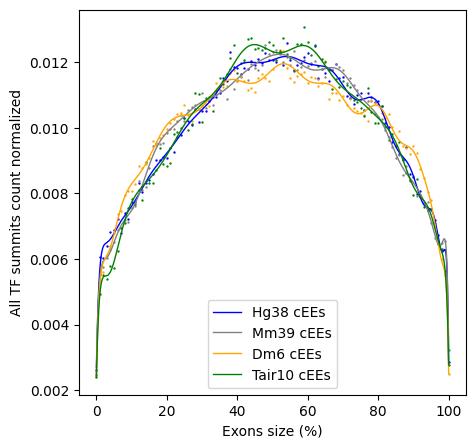

In [4]:
plt.figure(figsize=(5, 5))

#hg
x, y = zip(*flag_hg_norm.items())
x = list(x)
y = list(y)

mymodel = np.poly1d(np.polyfit(x, y, 30))
myline = np.linspace(0,100,2000)

plt.scatter(x, y, color="blue", s=0.5)
plt.plot(myline, mymodel(myline),color="blue",linewidth=1,label='Hg38 cEEs')

#mm
x, y = zip(*flag_mm_norm.items())
x = list(x)
y = list(y)

mymodel = np.poly1d(np.polyfit(x, y, 30))
myline = np.linspace(0,100,2000)

plt.scatter(x, y, color="gray", s=0.5)
plt.plot(myline, mymodel(myline),color="gray",linewidth=1,label='Mm39 cEEs')

#dm
x, y = zip(*flag_dm_norm.items())
x = list(x)
y = list(y)

mymodel = np.poly1d(np.polyfit(x, y, 30))
myline = np.linspace(0,100,2000)

plt.scatter(x, y, color="orange", s=0.5)
plt.plot(myline, mymodel(myline),color="orange",linewidth=1,label='Dm6 cEEs')

#tair
x, y = zip(*flag_tair_norm.items())
x = list(x)
y = list(y)

mymodel = np.poly1d(np.polyfit(x, y, 30))
myline = np.linspace(0,100,2000)

plt.scatter(x, y, color="green", s=0.5)
plt.plot(myline, mymodel(myline),color="green",linewidth=1,label='Tair10 cEEs')

###
plt.legend(loc='lower center')

plt.gca().set(xlabel ="Exons size (%)", ylabel = "All TF summits count normalized")  

plt.savefig("/home/mouren/Images/tls1/revisions/rev_3_pt1_distrib_tf_on_exons.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/revisions/rev_3_pt1_distrib_tf_on_exons.png", format="png", bbox_inches="tight", dpi=450)

plt.show()